# Energy Evaluation

### Define Energy Intesities

In [177]:
TRACE_RETENTION_HOURS = 360 # 30 days

# energy intensity kWh/GB
ENERGY_INTENSITY_NETWORK_KWH_PER_GB = 0.001875 
ENERGY_INTENSITY_STORAGE_WH_PER_TB_HOUR = 0.525 * TRACE_RETENTION_HOURS 

In [178]:
%cd evaluation/

[Errno 2] No such file or directory: 'evaluation/'
/root/oxn/evaluation


## Load pre-processed data
This data can be pre-processed with the help of kepler-evaluation.ipynb (CPU+RAM), network-evaluation.ipynb and storage-evaluation.ipynb. If you want to do new experiments, you have to create these files yourself in the meantioned jupyter notebooks.

In [179]:
import pandas as pd
import tabulate as tabulate
network_data = pd.read_csv("cadvisor_network_bytes_received_all_absolute_bytes.csv", index_col=0)
network_data_transmitted = pd.read_csv("cadvisor_network_bytes_transmitted_all_absolute_bytes.csv", index_col=0)
storage_data = pd.read_csv("cadvisor_storage_usage_writes_all_absolute_bytes.csv", index_col=0)
kepler_data_joules = pd.read_csv("pods_kepler_joules_all_absolute_joules.csv", index_col=0)
kepler_dram = pd.read_csv("pods_kepler_dram_joules_all_joules.csv", index_col=0)


## Network
Further process the network data to transform total bytes received to kWh using the energy intensity

In [180]:
# get the last value for each label based on the time_normalized_rounded as this is the total amount of data received
network_data_processed = network_data.groupby("label").last().reset_index()


# remove the column time_normalized_rounded as it is not needed anymore
network_data_processed = network_data_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
network_data_processed.columns = network_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

network_data_processed = network_data_processed.set_index("label")

network_data_processed = network_data_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio"
])


# this values are in bytes, convert them to GB
network_data_processed = network_data_processed / (1000 * 1000 * 1000)


print("Total network data received per Experiment (label) in GB:")
print(network_data_processed.round(2).to_markdown())


# calculate the energy consumption in kWh
network_data_processed = network_data_processed * ENERGY_INTENSITY_NETWORK_KWH_PER_GB


# print as table
print("Total network data received per Experiment (label) and energy consumption in kWh:")
print(network_data_processed.to_markdown())
print("Total energy consumption for storage in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in network_data_processed.index:
    if label == "Baseline":
        print(f"{label}: {network_data_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (network_data_processed.loc[label].sum() / network_data_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {network_data_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")

Total network data received per Experiment (label) in GB:
| label                  |   accounting |     ad |   cart |   checkout |   currency |   elasticsearch |   email |   flagd |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   jaeger-collector |   jaeger-query |   kafka |   otel-collector |   payment |   product-catalog |   prometheus |   quote |   recommendation |   shipping |   valkey-cart |
|:-----------------------|-------------:|-------:|-------:|-----------:|-----------:|----------------:|--------:|--------:|------------------:|-----------:|-----------------:|----------:|-----------------:|-------------------:|---------------:|--------:|-----------------:|----------:|------------------:|-------------:|--------:|-----------------:|-----------:|--------------:|
| Baseline               |          nan | nan    | nan    |        nan |        nan |          nan    |     nan |  nan    |               nan |     nan    |           nan    |       na

/tmp/ipykernel_2295715/716743434.py:50: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (network_data_processed.loc[label].sum() / network_data_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_2295715/716743434.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (network_data_processed.loc[label].sum() / network_data_processed.loc["Baseline"].sum()) * 100


In [181]:
# get the last value for each label based on the time_normalized_rounded as this is the total amount of data received
network_data_transmitted_processed = network_data_transmitted.groupby("label").last().reset_index()


# remove the column time_normalized_rounded as it is not needed anymore
network_data_transmitted_processed = network_data_transmitted_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
network_data_transmitted_processed.columns = network_data_transmitted_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

network_data_transmitted_processed = network_data_transmitted_processed.set_index("label")

network_data_transmitted_processed = network_data_transmitted_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio"
])


# this values are in bytes, convert them to GB
network_data_transmitted_processed = network_data_transmitted_processed / (1000 * 1000 * 1000)


print("Total network data transmitted per Experiment (label) in GB:")
print(network_data_transmitted_processed.round(2).to_markdown())


# calculate the energy consumption in kWh
network_data_transmitted_processed = network_data_transmitted_processed * ENERGY_INTENSITY_NETWORK_KWH_PER_GB


# print as table
print("Total network data transmitted per Experiment (label) and energy consumption in kWh:")
print(network_data_transmitted_processed.to_markdown())
print("Total energy consumption for storage in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in network_data_transmitted_processed.index:
    if label == "Baseline":
        print(f"{label}: {network_data_transmitted_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (network_data_transmitted_processed.loc[label].sum() / network_data_transmitted_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {network_data_transmitted_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")

Total network data transmitted per Experiment (label) in GB:
| label                  |   accounting |     ad |   cart |   checkout |   currency |   elasticsearch |   email |   flagd |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   jaeger-collector |   jaeger-query |   kafka |   otel-collector |   payment |   product-catalog |   prometheus |   quote |   recommendation |   shipping |   valkey-cart |
|:-----------------------|-------------:|-------:|-------:|-----------:|-----------:|----------------:|--------:|--------:|------------------:|-----------:|-----------------:|----------:|-----------------:|-------------------:|---------------:|--------:|-----------------:|----------:|------------------:|-------------:|--------:|-----------------:|-----------:|--------------:|
| Baseline               |       nan    | nan    | nan    |     nan    |     nan    |          nan    |  nan    |  nan    |            nan    |     nan    |           nan    |    na

/tmp/ipykernel_2295715/1786358496.py:50: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (network_data_transmitted_processed.loc[label].sum() / network_data_transmitted_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_2295715/1786358496.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (network_data_transmitted_processed.loc[label].sum() / network_data_transmitted_processed.loc["Baseline"].sum()) * 100


## Storage
Further process the storage data to transform total bytes used to kWh using the energy intensity

In [182]:
storage_data_processed = storage_data.groupby("label").last().reset_index()

# remove the column time_normalized_rounded as it is not needed anymore
storage_data_processed = storage_data_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
storage_data_processed.columns = storage_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

storage_data_processed = storage_data_processed.set_index("label")

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
storage_data_processed = storage_data_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio",
])

# rename opentelemetry-collector to otel-collector
storage_data_processed = storage_data_processed.rename(index={"opentelemetry-collector": "otel-collector"})


# this values are in bytes, convert them to TB
storage_data_processed = storage_data_processed / (1000 * 1000 * 1000 * 1000)



print("Storage data used per Experiment (label) in GB:")
print(storage_data_processed.multiply(1000).to_markdown())

# calculate the energy consumption in kWh
storage_data_processed = (storage_data_processed * ENERGY_INTENSITY_STORAGE_WH_PER_TB_HOUR) / 1000




# print as table
print("Total energy consumption for storage in kWh per Experiment (label):")
print(storage_data_processed.to_markdown())
print("Total energy consumption for storage in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in storage_data_processed.index:
    if label == "Baseline":
        print(f"{label}: {storage_data_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (storage_data_processed.loc[label].sum() / storage_data_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {storage_data_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")


Storage data used per Experiment (label) in GB:
| label                  |   accounting |           ad |   elasticsearch |   email |   flagd |   fraud-detection |    frontend |   frontend-proxy |       grafana |   image-provider |       kafka |   opensearch |   opentelemetry-collector |   payment |   prometheus |   recommendation |   valkey-cart |
|:-----------------------|-------------:|-------------:|----------------:|--------:|--------:|------------------:|------------:|-----------------:|--------------:|-----------------:|------------:|-------------:|--------------------------:|----------:|-------------:|-----------------:|--------------:|
| Baseline               |          nan | nan          |       nan       |     nan |     nan |       nan         | nan         |              nan | nan           |              nan | nan         |    nan       |                       nan |       nan |  nan         |              nan | nan           |
| 0%                     |          nan | nan 

/tmp/ipykernel_2295715/3131612112.py:54: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (storage_data_processed.loc[label].sum() / storage_data_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_2295715/3131612112.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (storage_data_processed.loc[label].sum() / storage_data_processed.loc["Baseline"].sum()) * 100


Further process the CPU energy data. We use the average over the experiment as the kWh

In [183]:
""" kepler_data_processed = kepler_data.groupby("label").mean()

# remove the column time_normalized_rounded as it is not needed anymore
kepler_data_processed = kepler_data_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
kepler_data_processed.columns = kepler_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
kepler_data_processed = kepler_data_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Base Persistence Istio"
])

# print as table
print("Total energy consumption in kWh per Experiment (label):")
print(kepler_data_processed.to_markdown())
print("Total energy consumption in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in kepler_data_processed.index:
    if label == "Baseline":
        print(f"{label}: {kepler_data_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (kepler_data_processed.loc[label].sum() / kepler_data_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {kepler_data_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)") """

' kepler_data_processed = kepler_data.groupby("label").mean()\n\n# remove the column time_normalized_rounded as it is not needed anymore\nkepler_data_processed = kepler_data_processed.drop(columns=["time_normalized_rounded"])\n\n# remove _system-under-evaluation from the column names\nkepler_data_processed.columns = kepler_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)\n\n# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence\nkepler_data_processed = kepler_data_processed.reindex([\n    "Baseline",\n    "0%",\n    "5%",\n    "10%",\n    "50%",\n    "Scrape 5s Persistence",\n    "Base Persistence",\n    "5% Persistence",\n    "10% Persistence",\n    "50% Persistence",\n    "Base Persistence Istio"\n])\n\n# print as table\nprint("Total energy consumption in kWh per Experiment (label):")\nprint(kepler_data_processed.to_markdown())\nprint("Total energy consumption in kWh

In [184]:
kepler_data_joules_processed = kepler_data_joules.groupby("label").last()

# remove the column time_normalized_rounded as it is not needed anymore
kepler_data_joules_processed = kepler_data_joules_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
kepler_data_joules_processed.columns = kepler_data_joules_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
kepler_data_joules_processed = kepler_data_joules_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio",
])  

kepler_data_joules_processed_total = kepler_data_joules_processed.copy()
kepler_data_joules_processed_total["Total"] = kepler_data_joules_processed.sum(axis=1)

# print as table
print("Total energy consumption in Joules per Experiment (label):")
print(kepler_data_joules_processed_total.to_markdown())

# convert Joules to kWh
kepler_data_joules_processed = kepler_data_joules_processed / 3600000  # 1 kWh = 3.6 million Joules
print("Total energy consumption in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in kepler_data_joules_processed.index:
    if label == "Baseline":
        print(f"{label}: {kepler_data_joules_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (kepler_data_joules_processed.loc[label].sum() / kepler_data_joules_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {kepler_data_joules_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")


Total energy consumption in Joules per Experiment (label):
| label                  |   accounting |      ad |    cart |   checkout |   configfile |   currency |   elasticsearch |   email |   exporter |    flagd |   flagd-ui |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   init-config |   istio-init |   istio-proxy |   jaeger-agent-sidecar |   jaeger-collector |   jaeger-query |   kafka |   master |   opensearch |   opentelemetry-collector |   payment |   product-catalog |   prometheus-server |   quote |   recommendation |   shipping |   valkey-cart |   wait-for-kafka |   wait-for-valkey-cart |   worker |   Total |
|:-----------------------|-------------:|--------:|--------:|-----------:|-------------:|-----------:|----------------:|--------:|-----------:|---------:|-----------:|------------------:|-----------:|-----------------:|----------:|-----------------:|--------------:|-------------:|--------------:|-----------------------:|-----------------

/tmp/ipykernel_2295715/3269104230.py:40: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (kepler_data_joules_processed.loc[label].sum() / kepler_data_joules_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_2295715/3269104230.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (kepler_data_joules_processed.loc[label].sum() / kepler_data_joules_processed.loc["Baseline"].sum()) * 100


# DRAM
Does not work as expected currently. Values are strange and mostly negativ.


In [185]:
kepler_ram_joules_processed = kepler_dram.groupby("label").last()

# remove the column time_normalized_rounded as it is not needed anymore
kepler_ram_joules_processed = kepler_ram_joules_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
kepler_ram_joules_processed.columns = kepler_ram_joules_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
kepler_ram_joules_processed = kepler_ram_joules_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio",
])  

kepler_ram_joules_processed_total = kepler_ram_joules_processed.copy()
kepler_ram_joules_processed_total["Total"] = kepler_ram_joules_processed.sum(axis=1)

# print as table
print("DRAM energy consumption in Joules per Experiment (label):")
print(kepler_ram_joules_processed_total.to_markdown())

# convert Joules to kWh
kepler_ram_joules_processed = kepler_ram_joules_processed / 3600000  # 1 kWh = 3.6 million Joules
print("Total energy consumption in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in kepler_ram_joules_processed.index:
    if label == "Baseline":
        print(f"{label}: {kepler_ram_joules_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (kepler_ram_joules_processed.loc[label].sum() / kepler_ram_joules_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {kepler_ram_joules_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")


DRAM energy consumption in Joules per Experiment (label):
| label                 |   accounting |        ad |      cart |   checkout |   configfile |   currency |   elasticsearch |   email |      exporter |     flagd |   flagd-ui |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   init-config |   istio-init |   istio-proxy |   jaeger-agent-sidecar |   jaeger-collector |   jaeger-query |     kafka |   master |   opensearch |   opentelemetry-collector |   payment |   product-catalog |   prometheus-server |   quote |   recommendation |   shipping |   valkey-cart |   wait-for-kafka |   wait-for-valkey-cart |    worker |    Total |
|:----------------------|-------------:|----------:|----------:|-----------:|-------------:|-----------:|----------------:|--------:|--------------:|----------:|-----------:|------------------:|-----------:|-----------------:|----------:|-----------------:|--------------:|-------------:|--------------:|-----------------------:|

/tmp/ipykernel_2295715/3233025589.py:39: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (kepler_ram_joules_processed.loc[label].sum() / kepler_ram_joules_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_2295715/3233025589.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (kepler_ram_joules_processed.loc[label].sum() / kepler_ram_joules_processed.loc["Baseline"].sum()) * 100


Categorize the energy consumption into "App", "Observability" and "System"

In [201]:
# | label            |   accounting |      ad |    cart |   checkout |   configfile |   copy-default-plugins |   currency |   elasticsearch |   elasticsearch-checker |   email |   flagd |   flagd-ui |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   init-config |   jaeger |   jaeger-agent-sidecar |   jaeger-collector |   jaeger-query |   kafka |   master |   opensearch |   opentelemetry-collector |   payment |   product-catalog |   prometheus-server |   quote |   recommendation |   shipping |   sysctl |   valkey-cart |   wait-for-kafka |   wait-for-valkey-cart |   worker |

kepler_mapping = {
    "accounting": "Primary Services",
    "ad": "Primary Services",
    "cart": "Primary Services",
    "checkout": "Primary Services",
    "configfile": "Primary Services",
    "copy-default-plugins": "Primary Services",
    "currency": "Primary Services",
    "elasticsearch": "Auxiliary Services",
    "elasticsearch-checker": "Auxiliary Services",
    "email": "Primary Services",
    "exporter": "Auxiliary Services",
    "flagd": "Auxiliary Services",
    "flagd-ui": "Auxiliary Services",
    "fraud-detection": "Primary Services",
    "frontend": "Primary Services",
    "frontend-proxy": "Primary Services",
    "grafana": "Auxiliary Services",
    "image-provider": "Primary Services",
    "init-config": "Primary Services",
    "istio-init": "Auxiliary Services",
    "istio-proxy": "Auxiliary Services",
    "jaeger": "Auxiliary Services",
    "jaeger-agent-sidecar": "Auxiliary Services",
    "jaeger-collector": "Auxiliary Services",
    "jaeger-query": "Auxiliary Services",
    "kafka": "Primary Services",
    "master": "Primary Services",
    "opensearch": "Auxiliary Services",
    "opentelemetry-collector": "Auxiliary Services",
    "payment": "Primary Services",
    "product-catalog": "Primary Services",
    "prometheus-server": "Auxiliary Services",
    "quote": "Primary Services",
    "recommendation": "Primary Services",
    "shipping": "Primary Services",
    "sysctl": "Auxiliary Services",
    "valkey-cart": "Primary Services",
    "wait-for-kafka": "Primary Services",
    "wait-for-valkey-cart": "Primary Services",
    "worker": "Primary Services",
}

#| label            |   accounting |          ad |   elasticsearch |   email |   flagd |   fraud-detection |     frontend |   frontend-proxy |     grafana |   image-provider |       kafka |   opensearch |   payment |   prometheus |   recommendation |   shipping |   valkey-cart |

storage_data_mapping = {
    "accounting": "Primary Services",
    "ad": "Primary Services",
    "elasticsearch": "Auxiliary Services",
    "email": "Primary Services",
    "flagd": "Auxiliary Services",
    "fraud-detection": "Primary Services",
    "frontend": "Primary Services",
    "frontend-proxy": "Primary Services",
    "grafana": "Auxiliary Services",
    "image-provider": "Primary Services",
    "kafka": "Primary Services",
    "opensearch": "Auxiliary Services",
    "payment": "Primary Services",
    "prometheus": "Auxiliary Services",
    "recommendation": "Primary Services",
    "shipping": "Primary Services",
    "valkey-cart": "Primary Services",
    "quote": "Primary Services",
    "product-catalog": "Primary Services",
    "opentelemetry-collector": "Auxiliary Services",
    "checkout": "Primary Services",
    "cart": "Primary Services",
}

# | label            |   accounting |          ad |        cart |    checkout |    currency |   elasticsearch |   email |       flagd |   fraud-detection |   frontend |   frontend-proxy |     grafana |   image-provider |      jaeger |       kafka |   opensearch |   opentelemetry-collector |     payment |   product-catalog |   prometheus |   quote |   recommendation |   shipping |   valkey-cart |

network_data_mapping = {
    "accounting": "Primary Services",
    "ad": "Primary Services",
    "cart": "Primary Services",
    "checkout": "Primary Services",
    "currency": "Primary Services",
    "elasticsearch": "Auxiliary Services",
    "email": "Primary Services",
    "flagd": "Auxiliary Services",
    "fraud-detection": "Primary Services",
    "frontend": "Primary Services",
    "frontend-proxy": "Primary Services",
    "grafana": "Auxiliary Services",
    "image-provider": "Primary Services",
    "jaeger": "Auxiliary Services",
    "jaeger-collector": "Auxiliary Services", 
    "jaeger-query": "Auxiliary Services", 
    "otel-collector": "Auxiliary Services", 
    "kafka": "Primary Services",
    "opensearch": "Auxiliary Services",
    "opentelemetry-collector": "Auxiliary Services",
    "payment": "Primary Services",
    "product-catalog": "Primary Services",
    "prometheus": "Auxiliary Services",
    "quote": "Primary Services",
    "recommendation": "Primary Services",
    "shipping": "Primary Services",
    "valkey-cart": "Primary Services",
}

experiment_names = {
    'Scrape 5s Persistence': 'Monitoring High', 
    'Scrape 30s Persistence': 'Monitoring Mid', 
    'Base Persistence': 'Baseline',
    '5% Persistence': 'Tracing Low', 
    '10% Persistence': 'Tracing Mid', 
    '50% Persistence': 'Tracing High',
    'Persistence Istio' : 'Service Mesh'
}

relevant_columns = [ 'Scrape 30s Persistence', 'Scrape 5s Persistence','Base Persistence','5% Persistence', '10% Persistence', '50% Persistence', 'Persistence Istio']

from operator import ne
from pickle import NEWOBJ
import re
import pandas as pd

def categorize_energy_consumption(data: pd.DataFrame, mapping: dict) -> pd.DataFrame:
    """
    Categorize and sum energy consumption based on component categories.

    Parameters:
    - data (pd.DataFrame): A DataFrame where rows represent measurements and columns represent component labels.
    - mapping (dict): A mapping from component label (column name) to a category (e.g., "Application", "Observability").

    Returns:
    - pd.DataFrame: A DataFrame with the same row indices as `data` and columns being the summed energy per category,
                    including an 'Uncategorized' column if needed.
    """
    # Initialize a DataFrame to store summed results
    categorized = pd.DataFrame(index=data.index)

    # Identify columns that are in the mapping
    mapped_cols = set(mapping.keys())
    data_cols = set(data.columns)
    unmapped_cols = list(data_cols - mapped_cols)

    # Print warning for unmapped columns
    if unmapped_cols:
        print(f"[WARNING] Uncategorized columns: {unmapped_cols}")

    # Iterate through unique categories
    for category in set(mapping.values()):
        cols = [col for col in data.columns if mapping.get(col) == category]
        categorized[category] = data[cols].sum(axis=1) if cols else 0

    # Add uncategorized columns
    if unmapped_cols:
        categorized["Uncategorized"] = data[unmapped_cols].sum(axis=1)
    
    return categorized


# Categorize the energy consumption for each dataset
network_categorized = categorize_energy_consumption(network_data_processed, network_data_mapping)
storage_categorized = categorize_energy_consumption(storage_data_processed, storage_data_mapping)
kepler_categorized = categorize_energy_consumption(kepler_data_joules_processed, kepler_mapping)

network_categorized = network_categorized.reindex(relevant_columns).rename(index=experiment_names)
storage_categorized = storage_categorized.reindex(relevant_columns).rename(index=experiment_names)
kepler_categorized = kepler_categorized.reindex(relevant_columns).rename(index=experiment_names)



In [196]:

# merge the categorized dataframes and sum on same column name
categorized_combined_raw = pd.concat([network_categorized, storage_categorized, kepler_categorized], axis=1)
categorized_combined = categorized_combined_raw.T.groupby(categorized_combined_raw.columns).sum().T


# add total summing up the categories for each experiment (label)
categorized_combined["Total"] = categorized_combined.sum(axis=1)


categorized_combined_transpose_wh = categorized_combined.T.copy() * 1000  # convert kWh to Wh


master = categorized_combined_transpose_wh.T.round(0)
master

,Auxiliary Services,Primary Services,Total
label,,,
Monitoring Mid,25.0,81.0,107.0
Monitoring High,29.0,79.0,108.0
Baseline,25.0,81.0,107.0
Tracing Low,30.0,81.0,111.0
Tracing Mid,36.0,80.0,117.0
Tracing High,83.0,76.0,159.0
Service Mesh,40.0,76.0,116.0


In [200]:
data = (kepler_categorized*1000)
data["Total"] = data.sum(axis=1)
data.round(0)

,Auxiliary Services,Primary Services,Total
label,,,
Monitoring Mid,11.0,73.0,84.0
Monitoring High,12.0,71.0,83.0
Baseline,11.0,73.0,84.0
Tracing Low,13.0,72.0,85.0
Tracing Mid,14.0,72.0,86.0
Tracing High,27.0,68.0,95.0
Service Mesh,26.0,67.0,93.0


In [189]:
1-data/master

,Auxiliary Services,Primary Services,Total
label,,,
Monitoring Mid,0.555727,0.099414,0.214446
Monitoring High,0.580305,0.104767,0.232458
Baseline,0.557883,0.100724,0.215941
Tracing Low,0.577233,0.106620,0.233813
Tracing Mid,0.597435,0.101486,0.261766
Tracing High,0.671308,0.108163,0.402132
Service Mesh,0.357709,0.114434,0.198322


/tmp/ipykernel_2295715/2200679214.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


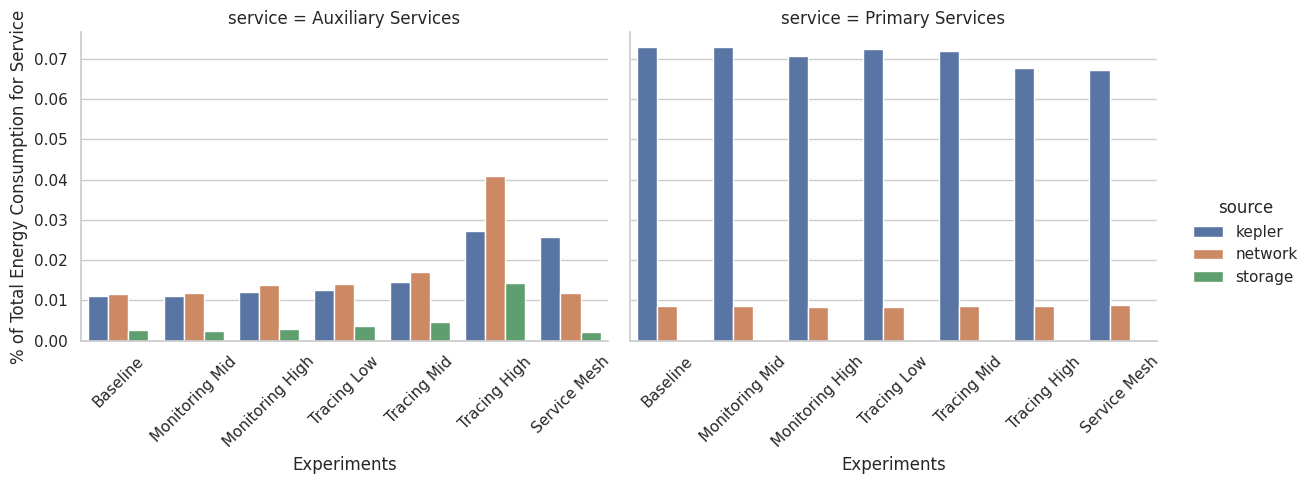

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import pandas as pd

def melt_df(df, source):
    # assume the experiment names are the index
    df = df.reset_index().melt(id_vars='label', var_name='service', value_name='value')
    df['source'] = source
    return df

df_k = melt_df(kepler_categorized,  'kepler')
df_n = melt_df(network_categorized, 'network')
df_s = melt_df(storage_categorized, 'storage')

# 1. fresh, monotonically‑increasing index
df_all = pd.concat([df_k, df_n, df_s], ignore_index=True)

# 2. desired experiment sequence
experiment_order = [
    'Baseline',
    'Monitoring Mid',
    'Monitoring High',
    'Tracing Low',
    'Tracing Mid',
    'Tracing High',
    'Service Mesh'     
]

# 3. tell pandas/Seaborn the order is meaningful
df_all['label'] = pd.Categorical(df_all['label'],
                                 categories=experiment_order,
                                 ordered=True)


# 4. plot
g = sns.catplot(
    data=df_all,
    x='label', y='value',
    hue='source', col='service',
    kind='bar', ci=None,
    height=5, aspect=1.2
)

g.set_axis_labels("Experiments", "% of Total Energy Consumption for Service")
g.set_xticklabels(rotation=45)

g.tight_layout()

plt.show()


/tmp/ipykernel_2295715/2436315518.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=['service', 'label'],
/tmp/ipykernel_2295715/2436315518.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['label'], rotation=45)
/tmp/ipykernel_2295715/2436315518.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['label'], rotation=45)


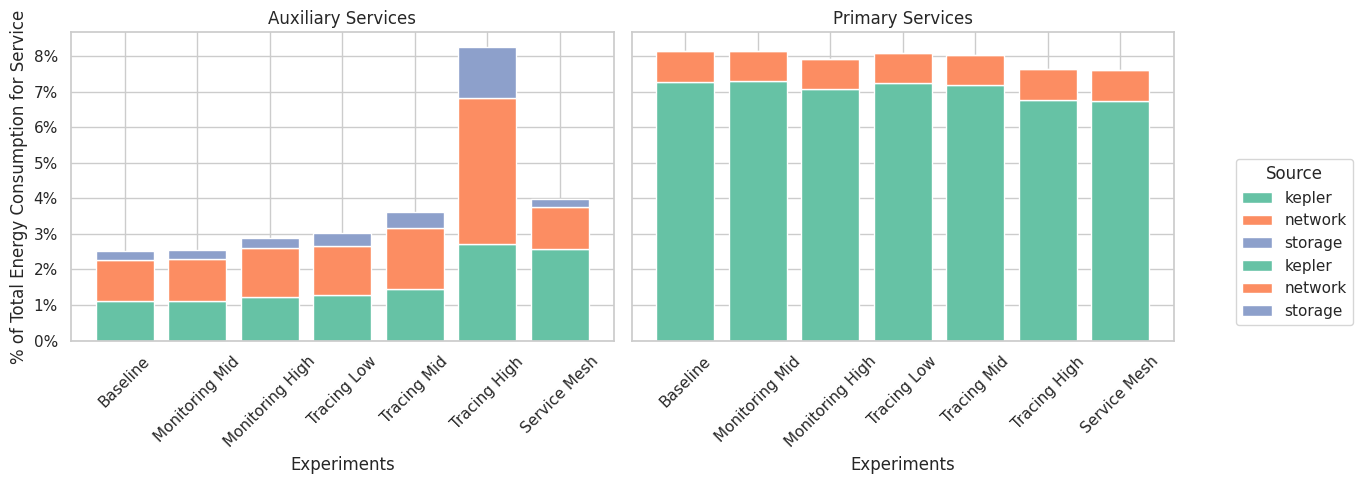

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np   # <- needed for cumulative bottoms

# ---------- (same data‑prep as you already have) ----------
def melt_df(df, source):
    df = df.reset_index().melt(id_vars='label',
                               var_name='service',
                               value_name='value')
    df['source'] = source
    return df

df_k = melt_df(kepler_categorized,  'kepler')
df_n = melt_df(network_categorized, 'network')
df_s = melt_df(storage_categorized, 'storage')

df_all = pd.concat([df_k, df_n, df_s], ignore_index=True)

experiment_order = [
    'Baseline', 'Monitoring Mid', 'Monitoring High',
    'Tracing Low', 'Tracing Mid', 'Tracing High', 'Service Mesh'
]
df_all['label'] = pd.Categorical(df_all['label'],
                                 categories=experiment_order,
                                 ordered=True)

# ---------- make one pivot table ----------
# rows: (service, experiment)  •  columns: source
pivot = (df_all
         .pivot_table(index=['service', 'label'],
                      columns='source',
                      values='value',
                      aggfunc='sum')
         .fillna(0)
         .reset_index())

sources   = df_all['source'].unique()                # ['kepler', 'network', 'storage']
colors    = sns.color_palette('Set2', n_colors=len(sources))
services  = pivot['service'].unique()
n_services = len(services)

fig, axes = plt.subplots(
    1, n_services, figsize=(6 * n_services, 5),
    sharey=True  # same % axis for every facet
)

if n_services == 1:             # handle the single‑facet case
    axes = [axes]

for ax, service in zip(axes, services):
    sub = pivot[pivot['service'] == service].copy()
    sub.sort_values('label', inplace=True)           # follow experiment_order

    bottoms = np.zeros(len(sub))
    for color, src in zip(colors, sources):
        ax.bar(sub['label'], sub[src], bottom=bottoms,
               color=color, label=src)
        bottoms += sub[src]

    ax.set_title(service)
    ax.set_xlabel("Experiments")
    ax.set_xticklabels(sub['label'], rotation=45)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

axes[0].set_ylabel("% of Total Energy Consumption for Service")
fig.legend(title="Source", bbox_to_anchor=(1.03, 0.5), loc="center left")
fig.tight_layout()
plt.show()
